In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import adjusted_rand_score
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor

In [88]:
train_df = pd.read_csv("./data/Train.csv")
test_df = pd.read_csv("./data/Test.csv")

In [89]:
train_df.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,100000.000000,100000.000000,70265.000000,100000.000000,100000.00000,100000.000000,100000.000000,95104.000000,70008.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,1.000000e+05
mean,49999.500000,334.479290,0.529837,5.267680,52.25343,2.118680,0.396740,22.154431,0.500986,2.470910,...,0.004360,0.001430,0.000940,0.007910,0.007890,0.00218,0.000320,0.001210,0.00021,5.138396e+06
std,28867.657797,194.004755,0.573645,3.905558,17.79250,0.829688,0.547632,8.286241,0.500003,1.944981,...,0.065887,0.037788,0.030645,0.088586,0.088475,0.04664,0.017886,0.034764,0.01449,4.187469e+06
min,0.000000,0.000000,0.000000,1.000000,29.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.480000e+05
25%,24999.750000,167.000000,0.000000,2.000000,40.00000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.644000e+06
50%,49999.500000,334.000000,0.000000,4.000000,52.00000,2.000000,0.000000,25.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.090000e+06
75%,74999.250000,501.000000,1.000000,7.000000,60.00000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.281000e+06
max,99999.000000,671.000000,2.000000,25.000000,217.00000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.054800e+07


In [90]:
test_df.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
count,100000.000000,100000.000000,69980.000000,100000.000000,100000.000000,100000.000000,100000.000000,94883.000000,70186.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,149999.500000,334.758430,0.532452,5.253820,52.278760,2.116690,0.397860,22.081353,0.499701,2.464950,...,0.006230,0.004500,0.001860,0.000770,0.00813,0.007800,0.001630,0.000190,0.001460,0.000190
std,28867.657797,193.831614,0.574559,3.900709,17.906689,0.829795,0.548662,8.300805,0.500003,1.947041,...,0.078684,0.066931,0.043088,0.027738,0.08980,0.087973,0.040341,0.013783,0.038182,0.013783
min,100000.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124999.750000,166.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149999.500000,334.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,174999.250000,502.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,199999.000000,671.000000,2.000000,25.000000,217.000000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Предобработка признаков 

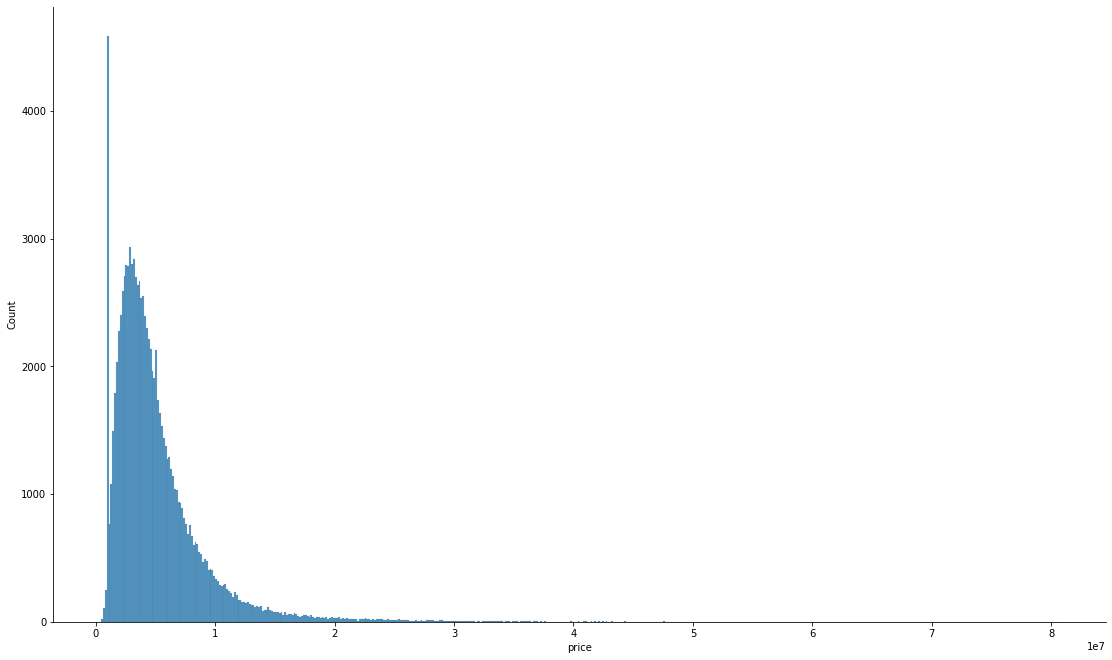

In [91]:
sns.displot(train_df.price).figure.set_size_inches(18, 10)

В датасете присутсвует большое количество объектов с одинаковой ценой. Рассмотрим их подробнее, чтобы понять являются ли они выбросами.

In [92]:
train_df.price.value_counts()

1000000     4079
2935000       36
2802000       35
3200000       34
2667000       31
            ... 
33503000       1
15319000       1
13008000       1
33233000       1
20835000       1
Name: price, Length: 15007, dtype: int64

In [93]:
train_df[train_df.price == 1000000].describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,4079.000000,4079.000000,2880.000000,4079.000000,4079.000000,4079.000000,4079.000000,3888.000000,2845.000000,4079.000000,...,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.0
mean,49834.346163,331.845060,0.516319,5.333905,52.497181,2.118902,0.396666,22.033179,0.490685,2.469233,...,0.004658,0.002206,0.000735,0.007600,0.007845,0.002697,0.000245,0.001716,0.000245,1000000.0
std,29069.121826,195.569166,0.565057,4.001325,18.614937,0.832360,0.548348,8.341390,0.500001,1.955105,...,0.068099,0.046926,0.027113,0.086856,0.088235,0.051866,0.015658,0.041395,0.015658,0.0
min,28.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
25%,24101.500000,161.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
50%,49744.000000,333.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
75%,75149.000000,500.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
max,99905.000000,671.000000,2.000000,25.000000,215.000000,6.000000,2.000000,30.000000,1.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000000.0


Можно заметить, что признаки этих объектов сильно различаются (area: 29..215, rooms: 1..6). Следовательно они являются выбросами.

In [94]:
train_df.drop(train_df.index[train_df.price == 1000000], inplace=True)

Также удалим крайние значения.

In [95]:
train_df.drop(train_df.index[train_df.price > 25000000], inplace=True)

train_df.drop(train_df.index[train_df.price < 750000], inplace=True)

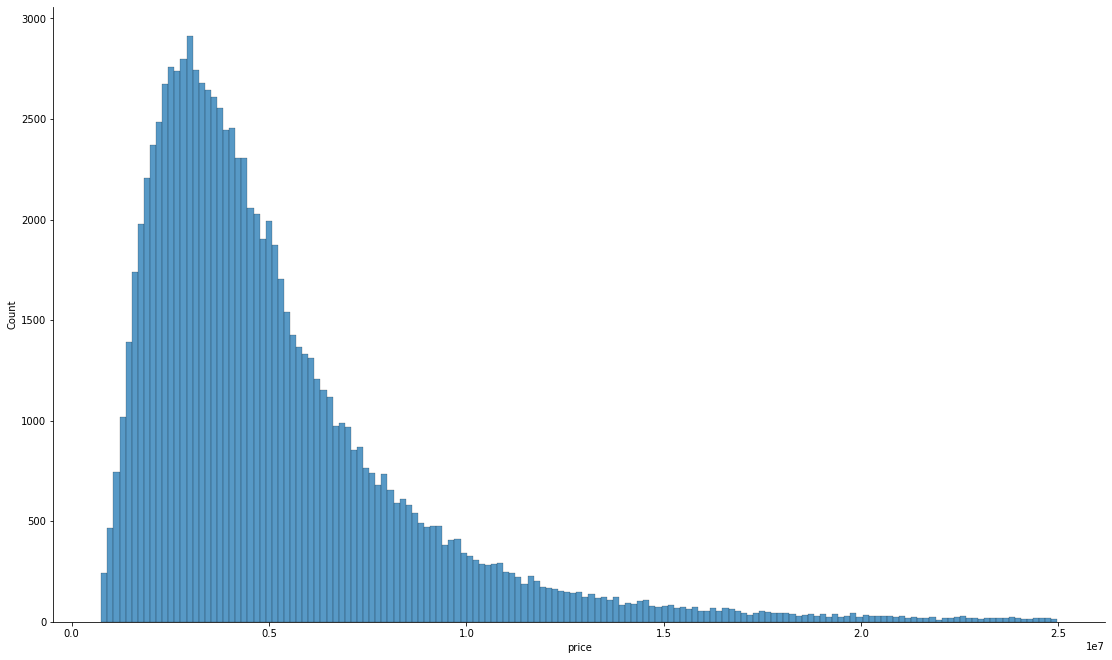

In [96]:
sns.displot(train_df.price).figure.set_size_inches(18, 10)

In [97]:
y = train_df["price"]

In [98]:
train_df.corr().style.background_gradient()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
id,1.000000,0.001542,-0.005661,-0.001075,-0.006607,-0.005155,-0.004485,0.005416,-0.005874,-0.002110,0.001546,0.007499,-0.005044,0.004260,0.002220,-0.000628,-0.001160,-0.006425,0.000522,0.001188,-0.000222,0.001841,0.002218,0.064152
street_id,0.001542,1.000000,-0.014450,-0.008911,-0.015347,0.002634,-0.009276,0.008675,-0.005298,0.006898,-0.002287,0.001253,0.000113,0.003155,0.005591,-0.007387,-0.001029,0.000091,0.007517,-0.004982,0.001118,-0.001153,0.004377,-0.029908
build_tech,-0.005661,-0.014450,1.000000,0.176074,0.318176,0.111368,0.787925,0.018589,0.007539,0.020411,-0.000319,-0.020948,-0.080417,-0.073407,-0.058033,-0.035783,-0.027340,0.074653,0.073667,0.037558,0.012824,0.091424,0.026377,0.405068
floor,-0.001075,-0.008911,0.176074,1.000000,0.151756,-0.009896,0.139668,0.012490,0.002859,-0.000514,-0.001608,-0.036731,-0.048845,-0.004318,0.026031,0.008566,0.070505,-0.053220,0.026853,0.011294,0.001864,0.065108,0.002159,0.228145
area,-0.006607,-0.015347,0.318176,0.151756,1.000000,0.801669,0.253089,0.015181,0.004071,0.160083,-0.000303,-0.047619,-0.043645,-0.019188,-0.014327,0.014535,0.007800,0.004706,-0.001373,0.088075,0.049915,0.023933,0.036555,0.624938
rooms,-0.005155,0.002634,0.111368,-0.009896,0.801669,1.000000,0.088606,0.008636,0.002115,0.207108,0.000259,0.000124,-0.011280,-0.009222,-0.004810,-0.002181,-0.006571,0.015471,0.006830,0.018411,0.014228,-0.007899,0.006936,0.357644
balcon,-0.004485,-0.009276,0.787925,0.139668,0.253089,0.088606,1.000000,0.015171,0.009042,0.015954,0.002594,-0.020084,-0.061960,-0.057788,-0.047889,-0.027106,-0.022333,0.056457,0.058993,0.031165,0.012550,0.061765,0.036486,0.322191
metro_dist,0.005416,0.008675,0.018589,0.012490,0.015181,0.008636,0.015171,1.000000,-0.000562,0.009339,0.004128,0.001048,-0.004294,0.003704,0.000259,0.004622,-0.002031,0.003510,0.000993,-0.002480,-0.001135,0.001500,0.000311,-0.106697
g_lift,-0.005874,-0.005298,0.007539,0.002859,0.004071,0.002115,0.009042,-0.000562,1.000000,0.003275,0.000858,-0.009734,-0.007430,-0.004837,-0.001825,-0.006215,-0.000096,0.000052,-0.002934,0.000533,-0.005533,-0.004850,-0.004941,0.007143
n_photos,-0.002110,0.006898,0.020411,-0.000514,0.160083,0.207108,0.015954,0.009339,0.003275,1.000000,0.038026,-0.010221,0.000527,0.006538,0.006484,0.003078,0.005108,0.009507,0.009182,-0.003962,0.002964,0.003389,0.001693,0.193532


Далее удалим колонку "id". В признаке "date" оставим информацию только о годе публикации объявления.

In [99]:
train_df.drop(columns=["id", "price"], inplace=True)

test_df.drop(columns=["id"], inplace=True)

In [100]:
train_df["date"] = train_df["date"].apply(lambda x: int(x[2:4]))

test_df["date"] = test_df["date"].apply(lambda x: int(x[2:4]))

In [101]:
train_df.describe()

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
count,95113.000000,95113.000000,66802.000000,95113.000000,95113.000000,95113.000000,95113.000000,90445.000000,66611.000000,95113.000000,...,95113.000000,95113.000000,95113.000000,95113.000000,95113.000000,95113.000000,95113.000000,95113.000000,95113.000000,95113.000000
mean,11.331311,334.502739,0.526047,5.253046,51.646379,2.106989,0.393679,22.165239,0.501599,2.460831,...,0.006371,0.004384,0.001409,0.000957,0.007990,0.007959,0.001998,0.000273,0.001178,0.000179
std,0.470687,193.957684,0.572065,3.897169,15.878622,0.814352,0.545525,8.284372,0.500001,1.934836,...,0.079567,0.066069,0.037508,0.030917,0.089032,0.088858,0.044650,0.016531,0.034295,0.013368
min,11.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,167.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,334.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,501.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,671.000000,2.000000,25.000000,217.000000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


В признаке "g_lift" есть пропуски данных, и он имеет низкую корреляцию с ценой, поэтому его можно удалить.

In [102]:
del train_df["g_lift"]
del test_df["g_lift"]

### Заполнение пропущенных данных

In [103]:
train_df["metro_dist"] = train_df["metro_dist"].fillna(train_df["metro_dist"].mean())
test_df["metro_dist"] = test_df["metro_dist"].fillna(test_df["metro_dist"].mean())

Для признака "build_tech" нельзя однозначно определить значение, которым можно заполнить пропуски. Поэтому найдем эти значения обучив RandomForestClassifier на данных где нет пропусков.

In [104]:
X_bt_train = train_df[train_df["build_tech"].notnull()].drop(columns="build_tech")

y_bt_train = train_df[train_df["build_tech"].notnull()]["build_tech"].astype(int).values

In [105]:
RFC = RandomForestClassifier(n_estimators=100)

In [106]:
RFC.fit(X_bt_train, y_bt_train)

RandomForestClassifier()

In [107]:
adjusted_rand_score(y_bt_train, RFC.predict(X_bt_train))

0.9996530952180972

In [108]:
bt_pred = pd.DataFrame({"build_tech": RFC.predict(train_df.drop(columns="build_tech"))}, index=train_df.index)

In [109]:
train_df.fillna(bt_pred, inplace=True)

In [110]:
bt_test_pred = pd.DataFrame({"build_tech": RFC.predict(test_df.drop(columns="build_tech"))}, index=test_df.index)

In [111]:
test_df.fillna(bt_test_pred, inplace=True)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=10)

# RandomForest

In [25]:
RFR = RandomForestRegressor(n_estimators=500, max_depth=None)

In [26]:
RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [27]:
mae(y_test, RFR.predict(X_test))

1274280.1692882935

# GradientBoosting

In [103]:
GBR = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=20)

In [104]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=500)

In [105]:
pred = GBR.predict(X_test)
mae(y_test, pred)

1218364.0667759927

# LGBMRegressor

In [33]:
LGBM = LGBMRegressor(n_estimators=500, learning_rate=1., max_depth=None)

In [34]:
LGBM.fit(X_train, y_train)

LGBMRegressor(learning_rate=1.0, max_depth=None, n_estimators=500)

In [35]:
pred = GBR.predict(X_test)
mae(y_test, pred)

1598961.4939809705

# XGBRegressor

In [113]:
XG = XGBRegressor(n_estimators=900,  learning_rate=0.35, max_depth=None)

In [114]:
XG.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.35, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [115]:
pred = XG.predict(X_test)
mae(y_test, pred)

530851.5380316755

# XGBRFRegressor

In [41]:
XGFR = XGBRFRegressor(n_estimators=500,  learning_rate=1., max_depth=None)

In [42]:
XGFR.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=0, num_parallel_tree=500,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [43]:
pred = XGFR.predict(X_test)
mae(y_test, pred)

1672632.8011091836

1. 7 843 171 087 396.351

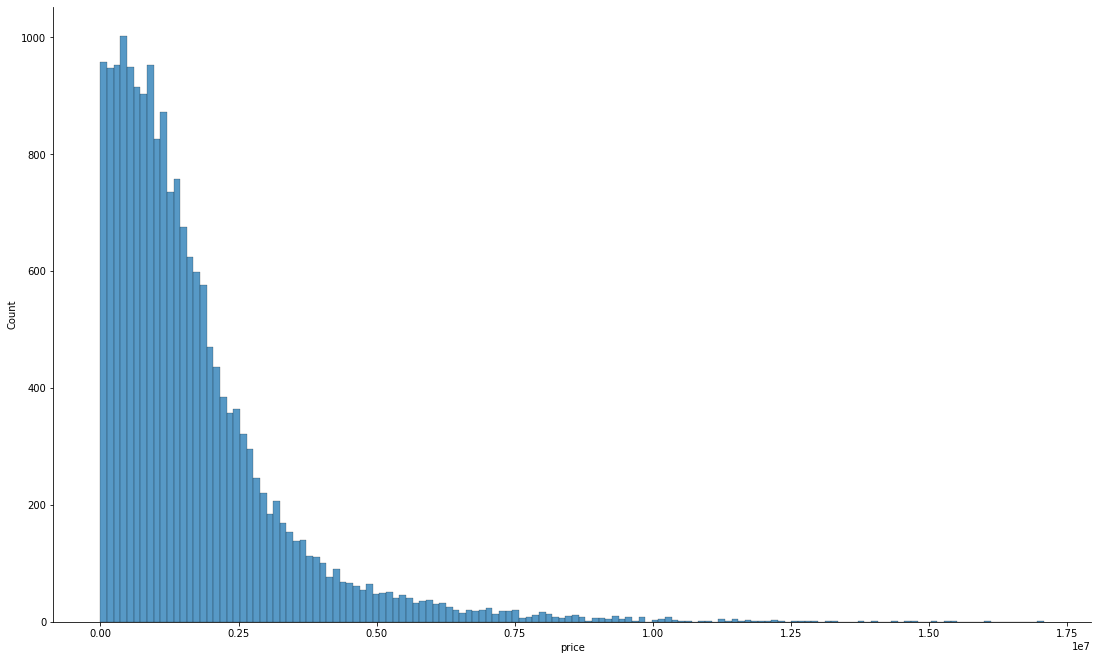

In [44]:
diff = (y_test - pred).apply(lambda x: abs(x))

sns.displot(diff).figure.set_size_inches(18, 10)

# CatBoostRegressor

In [45]:
CB = CatBoostRegressor(n_estimators=500,  learning_rate=1., max_depth=None)

In [46]:
CB.fit(X_train, y_train)

0:	learn: 2485856.9627244	total: 52.8ms	remaining: 26.3s
1:	learn: 2386832.1581830	total: 57ms	remaining: 14.2s
2:	learn: 2330824.9190810	total: 60.5ms	remaining: 10s
3:	learn: 2303800.4116490	total: 65.2ms	remaining: 8.08s
4:	learn: 2284101.4446152	total: 69.8ms	remaining: 6.91s
5:	learn: 2269060.5214005	total: 73.8ms	remaining: 6.07s
6:	learn: 2259772.8972878	total: 77.7ms	remaining: 5.47s
7:	learn: 2241145.5640809	total: 81.3ms	remaining: 5s
8:	learn: 2226527.3191780	total: 84.9ms	remaining: 4.63s
9:	learn: 2209257.8354841	total: 89.2ms	remaining: 4.37s
10:	learn: 2196078.8254248	total: 92.6ms	remaining: 4.12s
11:	learn: 2187000.3353288	total: 95.7ms	remaining: 3.89s
12:	learn: 2179226.4577788	total: 99ms	remaining: 3.71s
13:	learn: 2159036.6982299	total: 103ms	remaining: 3.56s
14:	learn: 2146215.6866741	total: 106ms	remaining: 3.44s
15:	learn: 2138890.8991695	total: 110ms	remaining: 3.31s
16:	learn: 2130975.7222700	total: 112ms	remaining: 3.19s
17:	learn: 2124400.3985095	total: 116

173:	learn: 1624725.1486418	total: 623ms	remaining: 1.17s
174:	learn: 1623273.2121151	total: 627ms	remaining: 1.16s
175:	learn: 1622792.8657092	total: 630ms	remaining: 1.16s
176:	learn: 1620598.4998013	total: 634ms	remaining: 1.16s
177:	learn: 1617024.4279949	total: 639ms	remaining: 1.16s
178:	learn: 1615845.3752079	total: 642ms	remaining: 1.15s
179:	learn: 1615289.1261804	total: 649ms	remaining: 1.15s
180:	learn: 1614126.9300143	total: 655ms	remaining: 1.15s
181:	learn: 1612764.8601083	total: 659ms	remaining: 1.15s
182:	learn: 1611780.1999128	total: 663ms	remaining: 1.15s
183:	learn: 1611022.3795222	total: 667ms	remaining: 1.15s
184:	learn: 1609364.3351592	total: 671ms	remaining: 1.14s
185:	learn: 1608026.9797624	total: 674ms	remaining: 1.14s
186:	learn: 1607203.9940870	total: 677ms	remaining: 1.13s
187:	learn: 1606189.5945001	total: 680ms	remaining: 1.13s
188:	learn: 1605253.9505139	total: 683ms	remaining: 1.12s
189:	learn: 1604758.7105645	total: 685ms	remaining: 1.12s
190:	learn: 16

369:	learn: 1481788.4711619	total: 1.2s	remaining: 421ms
370:	learn: 1481533.4656945	total: 1.2s	remaining: 417ms
371:	learn: 1481298.7012322	total: 1.2s	remaining: 414ms
372:	learn: 1480590.6953801	total: 1.21s	remaining: 411ms
373:	learn: 1479923.5331266	total: 1.21s	remaining: 408ms
374:	learn: 1479394.6637852	total: 1.21s	remaining: 405ms
375:	learn: 1479153.4189104	total: 1.22s	remaining: 401ms
376:	learn: 1478567.4081958	total: 1.22s	remaining: 398ms
377:	learn: 1478385.6377020	total: 1.22s	remaining: 394ms
378:	learn: 1478214.8126185	total: 1.22s	remaining: 391ms
379:	learn: 1478032.6501182	total: 1.23s	remaining: 388ms
380:	learn: 1477844.0530060	total: 1.23s	remaining: 384ms
381:	learn: 1477578.0933809	total: 1.23s	remaining: 381ms
382:	learn: 1477234.4583445	total: 1.24s	remaining: 377ms
383:	learn: 1476716.5744602	total: 1.24s	remaining: 374ms
384:	learn: 1476357.1014014	total: 1.24s	remaining: 371ms
385:	learn: 1476018.6648717	total: 1.24s	remaining: 367ms
386:	learn: 14758

In [47]:
pred = CB.predict(X_test)
mae(y_test, pred)

1229207.2522073167

# Вывод

Самое низкое значение средней ошибки у модели XGBRegressor, пэтому обучим данную модель на полной выборке и получим предсказания для тестовых данных. 

In [116]:
XG.fit(train_df, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.35, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [117]:
mae(y, XG.predict(train_df))

326797.37645601894

In [118]:
xgb_pred = XG.predict(test_df)

In [119]:
pred_df = pd.read_csv("./data/Test.csv")
pred_df["price"] = xgb_pred

pred_df[["id", "price"]].to_csv("xgb_pred.csv", index=False)

!cat xgb_pred.csv | head

id,price
100000,8732333.0
100001,5301836.0
100002,3935195.0
100003,3265392.2
100004,7177357.0
100005,5490474.5
100006,2230862.5
100007,1250043.9
100008,3304127.2
cat: write error: Broken pipe
